<a href="https://colab.research.google.com/github/gouravAtre/SentimentAnalyser/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing twitter dataset**

---



In [1]:
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/investigating-sentiment-analysis/data/sentiment140-subset.csv.zip -P data
!unzip -n -d data data/sentiment140-subset.csv.zip

--2022-05-22 09:13:51--  https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/investigating-sentiment-analysis/data/sentiment140-subset.csv.zip
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17927149 (17M) [application/zip]
Saving to: ‘data/sentiment140-subset.csv.zip’

sentiment140-subset 100%[===================>]  17.10M  --.-KB/s    in 0.1s    

2022-05-22 09:13:51 (149 MB/s) - ‘data/sentiment140-subset.csv.zip’ saved [17927149/17927149]

Archive:  data/sentiment140-subset.csv.zip
  inflating: data/sentiment140-subset.csv  


**Load the libraries**

---



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from wordcloud import WordCloud
import re

In [3]:
df = pd.read_csv("data/sentiment140-subset.csv", nrows=30000)
df.head()

,polarity,text
0,0,@kconsidder You never tweet
1,0,Sick today coding from the couch.
2,1,"@ChargerJenn Thx for answering so quick,I was ..."
3,1,Wii fit says I've lost 10 pounds since last ti...
4,0,@MrKinetik Not a thing!!! I don't really have...


In [4]:
print(df.shape)
df.polarity.value_counts()

(30000, 2)


1    15064
0    14936
Name: polarity, dtype: int64

**Graphical Representation**

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


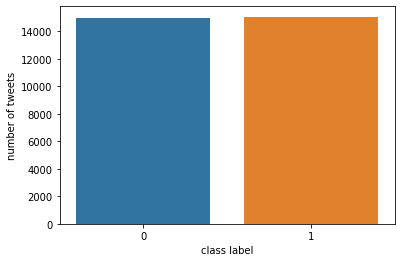

In [5]:
sns.countplot(df.polarity)
plt.xlabel('class label')
plt.ylabel('number of tweets')
plt.show()

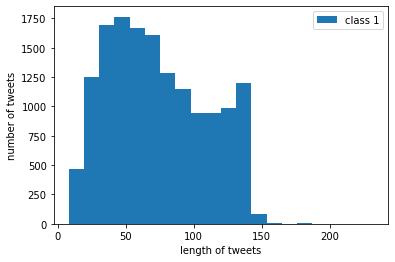

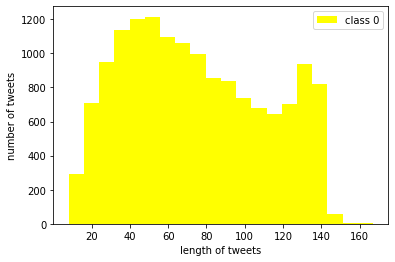

In [6]:
plt.hist(df[df['polarity']==1].text.str.len(),bins=20,label='class 1')
plt.legend()
plt.xlabel('length of tweets')
plt.ylabel('number of tweets')
plt.show()
plt.hist(df[df['polarity']==0].text.str.len(),color='yellow',bins=20,label='class 0')
plt.legend()
plt.xlabel('length of tweets')
plt.ylabel('number of tweets')
plt.show()

**Preprocessing the Dataset**

---


1. Removing Twitter Handles (@user)

2. Removing urls from text

3. Removing Punctuations, Numbers, and Special Characters

4. Convert the word to lowercase

5. Remove Stopwords

6. Stemming the word

7. Lemmatization

**Stopword Removal**

---



In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from nltk.corpus import stopwords

In [9]:
stopword=nltk.corpus.stopwords.words('english')

for index,text_ in enumerate(df.text):
    text_=re.sub(r'@[\w]*','',text_) #Removing Twitter Handles (@user)
    text_=re.sub(r'http/S+','',text_) #Removing urls from text 
    text = re.sub(r"\d+", " ", text_) #Removing digits
    text_=re.sub(r'[^A-Za-z#]',' ',text_) #Removing Punctuations, Numbers, and Special Characters
    text_=" ".join(i.lower() for i in text_.split() if i.lower() not in stopword) #Removing stopword
    text_ = re.sub(r"[^\w\s]", " ", text_)                       # Removes all punctuations
    text_ = re.sub(r'(.)\1+', r'\1\1', text_)                         # Convert more than 2 letter repetitions to 2 letter
    text_ = re.sub(r"\s+", " ", str(text_))                           # Replaces double spaces with single space 
    #df.text[index]=text_

In [10]:
df.head(100)

,polarity,text
0,0,@kconsidder You never tweet
1,0,Sick today coding from the couch.
2,1,"@ChargerJenn Thx for answering so quick,I was ..."
3,1,Wii fit says I've lost 10 pounds since last ti...
4,0,@MrKinetik Not a thing!!! I don't really have...
...,...,...
95,0,*(^#*^*($^)*&amp;&amp;((@&amp;&amp;^&amp; Car ...
96,0,Another late night with no sleep in sight... p...
97,0,"Aw, my tattoo is buring like a motherfucker ug..."
98,1,"@aTexasAttitude I completely agree, no amount ..."


**Stemming**

---



In [13]:
pt=PorterStemmer()
wordnet=WordNetLemmatizer()
for index,text_ in enumerate(df.text):
    text_=" ".join(pt.stem(i) for i in text_.split())
    print(text_)

Streaming output truncated to the last 5000 lines.
shower...shower..
@blubberfat you'll be fine allybear! the kids'll love you
safe made the late night drive home from charleston, for anyon who care
@michael_saul have a fun week in sf! have a drink at the tonga room for me.
breadbox64: twitter client for the commodor 64 - video...mah http://viigo.im/ue0
&quot;do It again&quot; (blogula remix) de the fire and reason http://bit.ly/nskpz â¡gratis!
it' all fun &amp; game until someon tell you to &quot;f*** off&quot; and you have no idea if they'r kidding. I haz a big sad.
doesn't feel good
@b3anz that' gotta suck! At least u get to watch the game 2nite!
My mom start cri when I told her farrah fawcett is dead
i wanna be at home in my own bed. im just not in the mood to be spend the night somewher else.
@rjdenni Ha ha, aw shucks! have fun , catch you later
sat in pshe lesson. wast of time to be fair with my head of year all tomorrow what fun!
ok now im def readi for bed, * one week today .. 

**Lemmetization**

---



In [14]:
from nltk.stem.wordnet import WordNetLemmatizer

In [15]:
wnet = WordNetLemmatizer()

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [17]:
for index,text_ in enumerate(df.text):
    text_=" ".join(pt.stem(i) for i in text_.split())
    text_=" ".join(wordnet.lemmatize(i) for i in text_.split())  
    df.text[index]=text_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
df['preprocess_tweet']=df.text[:len(df)]
df['length_tweet']=df['preprocess_tweet'].str.len()
df.head(100)


,polarity,text,preprocess_tweet,length_tweet
0,0,@kconsidd you never tweet,@kconsidd you never tweet,25
1,0,sick today code from the couch.,sick today code from the couch.,31
2,1,"@chargerjenn thx for answer so quick,i wa afra...","@chargerjenn thx for answer so quick,i wa afra...",119
3,1,wii fit say i'v lost 10 pound sinc last time,wii fit say i'v lost 10 pound sinc last time,44
4,0,@mrkinetik not a thing!!! I don't realli have ...,@mrkinetik not a thing!!! I don't realli have ...,57
...,...,...,...,...
95,0,*(^#*^*($^)*&amp;&amp;((@&amp;&amp;^&amp; car ...,*(^#*^*($^)*&amp;&amp;((@&amp;&amp;^&amp; car ...,115
96,0,anoth late night with no sleep in sight... poo...,anoth late night with no sleep in sight... poo...,129
97,0,"aw, my tattoo is bure like a motherfuck ugh an...","aw, my tattoo is bure like a motherfuck ugh an...",69
98,1,"@atexasattitud I complet agree, no amount of $...","@atexasattitud I complet agree, no amount of $...",117


**EDA**

---



In [ ]:
sentiments = ['Positive Sentiment', 'Negative Sentiment'] 
slices = [(df['polarity'] != 0).sum(), (df['polarity'] == 0).sum()] 
colors = ['g', 'r'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show() 

<Figure size 3600x2400 with 0 Axes>

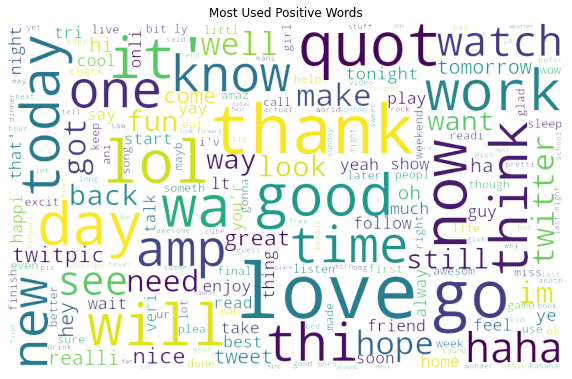

In [19]:
positive_words =' '.join([text for text in df['text'][df['polarity'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Positive Words")
#plt.savefig('assets/positive_words.png')
plt.show()

<Figure size 3600x2400 with 0 Axes>

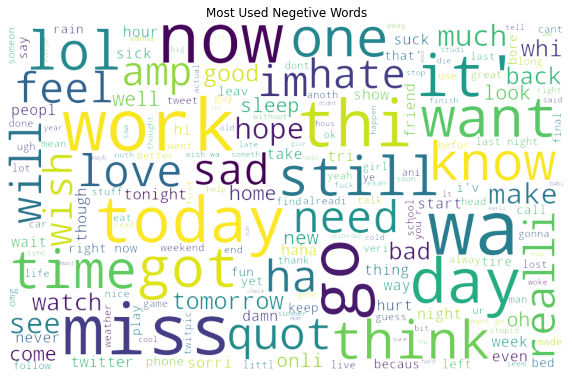

In [20]:
negative_words =' '.join([text for text in df['text'][df['polarity'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, 
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(negative_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Negetive Words")
#plt.savefig('assets/negetive_words.png')
plt.show()

**Featurization**

**Bag of Words(BoW)**

---



In [22]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(df['text'])  
final_vectorized_data

<30000x214575 sparse matrix of type '<class 'numpy.int64'>'
	with 692243 stored elements in Compressed Sparse Row format>

**TF-IDF**

---



In [23]:
#from sklearn.feature_extraction.text import TfidfVectorizer 

#tf_idf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,3))
#final_vectorized_data = tf_idf_vectorizer.fit_transform(df['text'])

#final_vectorized_data

In [24]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, df['polarity'],
                                                    test_size=0.2, random_state=69)  

In [25]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (24000, 214575)
X_test_shape :  (6000, 214575)
y_train_shape :  (24000,)
y_test_shape :  (6000,)


**Naive Bayes Classifier**


---



In [26]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

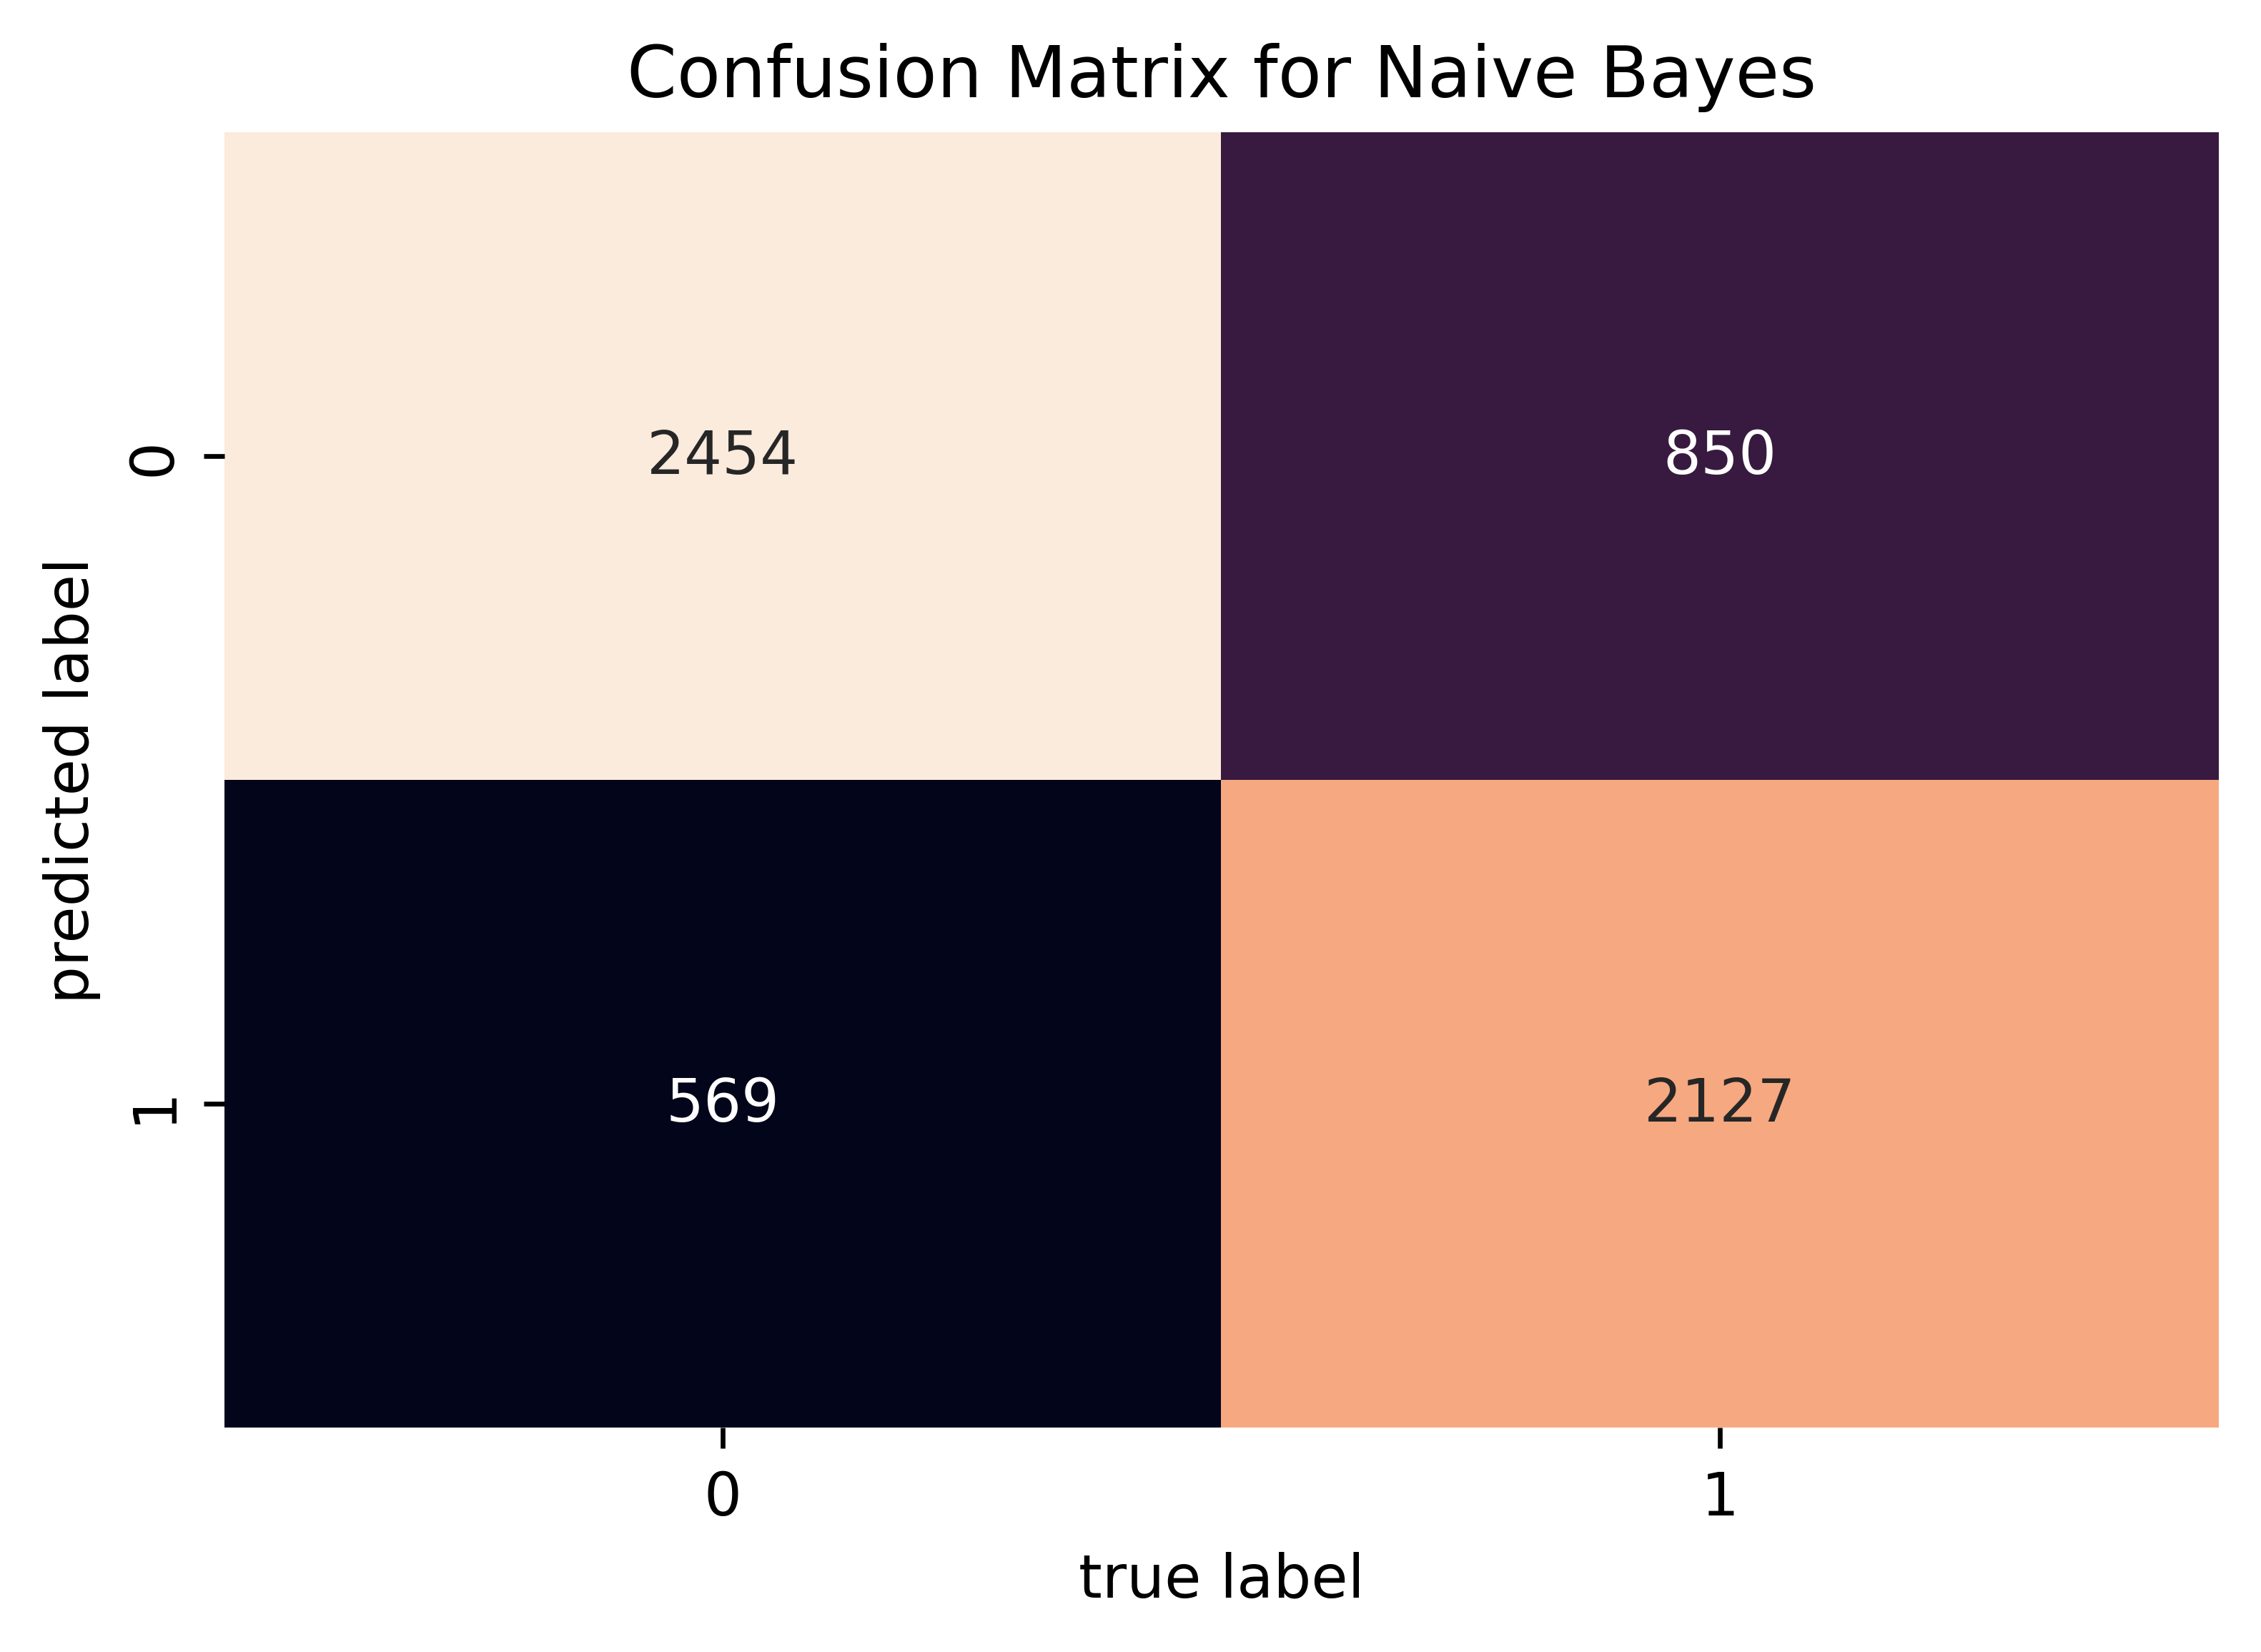

In [27]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig("assets/confusion_matrix.png")
plt.show()

**Accuracy Calculation**

---



In [28]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.7635


**Saving trained model**

---



In [30]:
import pickle

model_filename = "Sentiment classifier.sav"

saved_model = pickle.dump(model_naive, open(model_filename,'wb'))

print('Model is saved into to disk successfully')

Model is saved into to disk successfully


**Loading model**


In [31]:
model_filename = "Sentiment classifier.sav"

my_knn_model = pickle.load(open(model_filename, 'rb')) # the model will be read into the object my_knn_model 
                                                      # and you can use the same model to predict the new data.

result = my_knn_model.predict(X_test) # X_test is where the new data that is to be predicted is inserted, 
                                      # here X_test is a part of dataset 

result

array([0, 0, 0, ..., 0, 0, 0])